In [1]:
import numpy as np
import matplotlib.pyplot as plt
# オイラー法で2階微分方程式の数値階を得る関数
# t0:tの初期値
# v0:vの初期値
# y0:y初期値
# tmax:tの最大値
# a = - kx/mの微分方程式を解く (但しk/m=1)
def euler_method_2ord(t0, v0, y0, tmax, n=12):
    # t0~tmaxを2**n+1個に分割
    t = np.linspace(t0, tmax, 2**n + 1)
    
    # tの刻み幅Δt
    dt = t[1] - t[0]
    
    # tと同じ形状の未初期化配列を生成
    v = np.empty_like(t)
    y = np.empty_like(t)
    
    # v[0]に初期値y0を代入
    v[0] = v0
    y[0] = y0
    
    # オイラー法でt毎の数値解を計算
    for k in range(len(t) - 1):
        v[k+1] = v[k] - y[k] * dt
        y[k+1] = y[k] + v[k] * dt
    
    return t, v, y

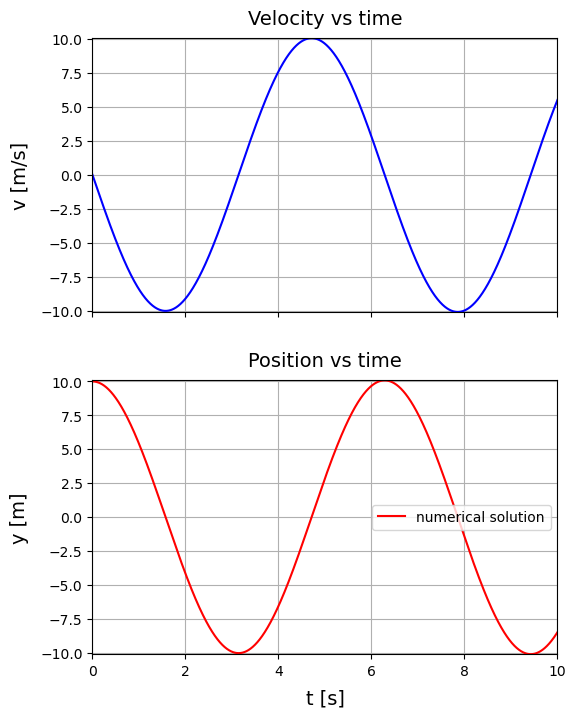

In [2]:
# オイラー法でy''=-yを解く
t, v, y = euler_method_2ord(0, 0, 10, 10)

# FigureとAxesの設定
fig, ax = plt.subplots(2, 1, figsize=(6,8), sharex="col", gridspec_kw=dict(hspace=0.25))
# 速度の時間変化をプロット
ax[0].set_title("Velocity vs time", fontsize=14, pad=10)
ax[0].grid()
ax[0].set_xlim(0, max(t))
ax[0].set_ylim(min(v), max(v))
ax[0].set_ylabel("v [m/s]", fontsize=14, labelpad=8)
ax[0].plot(t, v, color="blue")

# 高度の時間変化をプロット
ax[1].set_title("Position vs time", fontsize=14, pad=10)
ax[1].grid()
ax[1].set_xlim(0, max(t))
ax[1].set_ylim(min(y), max(y))
ax[1].set_xlabel("t [s]", fontsize=14, labelpad=8)
ax[1].set_ylabel("y [m]", fontsize=14, labelpad=8)
ax[1].plot(t, y, color="red",label="numerical solution")

# 凡例を表示
ax[1].legend()

plt.show()